# Assignment 2.

## Formalia:

Please read the [assignment overview page](https://github.com/suneman/socialdataanalysis2020/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Monday March 30th, 2020 at 23:55. Hand in your files via [`http://peergrade.io`](http://peergrade.io/).

**Peergrading date and time**: _Remember that after handing in you have 6 days to evaluate a few assignments written by other members of the class_. Thus, the peer evaluations are due on Sunday April 5th, 2020 at 23:55. (The reason I'm asking you to do the peer evaluations on the sunday is that I want you to be able to enjoy the easter break fully.)

## Part 1: Questions to text and lectures.

A) Please answer my questions to the Segal and Heer paper we read during lecture 7 and 8.

* What is the *Oxford English Dictionary's* defintion of a narrative?
* What is your favorite visualization among the examples in section 3? Explain why in a few words.
* What's the point of Figure 7?
* Use Figure 7 to find the most common design choice within each category for the Visual narrative and Narrative structure (the categories within visual narrative are 'visual structuring', 'highlighting', etc).
* Check out Figure 8 and section 4.3. What is your favorite genre of narrative visualization? Why? What is your least favorite genre? Why?


B) Also please answer the questions to my talk on [explanatory data visualization](https://www.youtube.com/watch?v=yHKYMGwefso)

* What are the three key elements to keep in mind when you design an explanatory visualization?
* In the video I talk about (1) *overview first*,  (2) *zoom and filter*,  (3) *details on demand*. 
  - Go online and find a visualization that follows these principles (don't use one from the video). 
  - Explain how it does achieves (1)-(3). It might be useful to use screenshots to illustrate your explanation.
* Explain in your own words: How is explanatory data analysis different from exploratory data analysis?

## Part 2: Random forest and weather

The aim here is to recreate the work you did in Part 1 and 2 of the Week 7 lecture. I've phrased things differently relative to the exercise to make the purpose more clear. 

Part 2A: Random forest binary classification. 
* Using the and instructions and material from Week 7, build a *random forest* classifier to distinguish between two types (you choose) of crime using on spatio-temporal (where/when) features of data describing the two crimes. When you're done, you should be able to give the classifier a place and a time, and it should tell you which of the two  types of crime happened there.
  - Explain about your choices for training/test data, features, and encoding. (You decide how to present your results, but here are some example topics to consider: Did you balance the training data? What are the pros/cons of balancing? Do you think your model is overfitting? Did you choose to do cross-validation? Which specific features did you end up using? Why? Which features (if any) did you one-hot encode? Why ... or why not?))
  - Report accuracy. Discuss the model performance.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", 100)

%matplotlib inline

In [29]:
crime_df = pd.read_csv("/home/sunny/Downloads/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")
print('Dataset Size : ', crime_df.shape)
crime_df.head()

Dataset Size :  (2131246, 33)


,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,DELETE - Fire Prevention Districts,DELETE - Police Districts,DELETE - Supervisor Districts,DELETE - Zip Codes,DELETE - Neighborhoods,DELETE - 2017 Fix It Zones,Civic Center Harm Reduction Project Boundary,Fix It Zones as of 2017-11-06,DELETE - HSOC Zones,Fix It Zones as of 2018-02-07,"CBD, BID and GBD Boundaries as of 2017","Areas of Vulnerability, 2016",Central Market/Tenderloin Boundary,Central Market/Tenderloin Boundary Polygon - Updated,HSOC Zones as of 2018-06-05,OWED Public Spaces
0,146196161,NON-CRIMINAL,LOST PROPERTY,Tuesday,09/23/2014,01:00,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421,POINT (-122.403404791479 37.775420706711),1.461962e+13,32.0,1.0,10.0,34.0,14.0,2.0,9.0,28853.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
1,150045675,ASSAULT,BATTERY,Thursday,01/15/2015,17:00,TARAVAL,NONE,1800 Block of VICENTE ST,-122.485604,37.738821,POINT (-122.48560378101 37.7388214326705),1.500457e+13,40.0,10.0,7.0,35.0,1.0,8.0,3.0,29491.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2,140632022,SUSPICIOUS OCC,INVESTIGATIVE DETENTION,Wednesday,07/30/2014,09:32,BAYVIEW,NONE,100 Block of GILLETTE AV,-122.396535,37.710660,POINT (-122.396535107224 37.7106603302503),1.406320e+13,89.0,2.0,9.0,1.0,10.0,3.0,8.0,309.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
3,150383259,ASSAULT,BATTERY,Saturday,05/02/2015,23:10,BAYVIEW,"ARREST, BOOKED",2400 Block of PHELPS ST,-122.400131,37.730093,POINT (-122.400130573297 37.7300925390327),1.503833e+13,87.0,2.0,9.0,1.0,10.0,3.0,8.0,58.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
4,40753980,OTHER OFFENSES,RECKLESS DRIVING,Friday,07/02/2004,13:43,BAYVIEW,NONE,I-280 / CESAR CHAVEZ ST,-120.500000,90.000000,POINT (-120.5 90),4.075398e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
%%time

crime_df["DateTime"] = crime_df["Date"] + " " + crime_df["Time"]
### Converting various datae time columns to proper format
crime_df['DateTime'] = pd.to_datetime(crime_df['DateTime'])
crime_df['Date'] = pd.to_datetime(crime_df['Date'])
#crime_df['Time'] = pd.to_timedelta([val+':00' for val in crime_df['Time']])
## Adding Month Column to dataset with month names
crime_df["Month"] = [val.month_name() for val in crime_df["DateTime"]] 
## Adding Hour of week, hour and week number columns
crime_df["HourOfWeek"] =  crime_df['DateTime'].dt.dayofweek * 24 + (crime_df['DateTime'].dt.hour)
crime_df["Hour"] = crime_df['DateTime'].dt.hour
crime_df["Week"] = crime_df["DateTime"].dt.week
crime_df.head()

CPU times: user 4min 32s, sys: 322 ms, total: 4min 33s
Wall time: 4min 40s


,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,DELETE - Fire Prevention Districts,DELETE - Police Districts,DELETE - Supervisor Districts,DELETE - Zip Codes,DELETE - Neighborhoods,DELETE - 2017 Fix It Zones,Civic Center Harm Reduction Project Boundary,Fix It Zones as of 2017-11-06,DELETE - HSOC Zones,Fix It Zones as of 2018-02-07,"CBD, BID and GBD Boundaries as of 2017","Areas of Vulnerability, 2016",Central Market/Tenderloin Boundary,Central Market/Tenderloin Boundary Polygon - Updated,HSOC Zones as of 2018-06-05,OWED Public Spaces,DateTime,Month,HourOfWeek,Hour,Week
0,146196161,NON-CRIMINAL,LOST PROPERTY,Tuesday,2014-09-23,01:00,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421,POINT (-122.403404791479 37.775420706711),1.461962e+13,32.0,1.0,10.0,34.0,14.0,2.0,9.0,28853.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2014-09-23 01:00:00,September,25.0,1.0,39.0
1,150045675,ASSAULT,BATTERY,Thursday,2015-01-15,17:00,TARAVAL,NONE,1800 Block of VICENTE ST,-122.485604,37.738821,POINT (-122.48560378101 37.7388214326705),1.500457e+13,40.0,10.0,7.0,35.0,1.0,8.0,3.0,29491.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2015-01-15 17:00:00,January,89.0,17.0,3.0
2,140632022,SUSPICIOUS OCC,INVESTIGATIVE DETENTION,Wednesday,2014-07-30,09:32,BAYVIEW,NONE,100 Block of GILLETTE AV,-122.396535,37.710660,POINT (-122.396535107224 37.7106603302503),1.406320e+13,89.0,2.0,9.0,1.0,10.0,3.0,8.0,309.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2014-07-30 09:32:00,July,57.0,9.0,31.0
3,150383259,ASSAULT,BATTERY,Saturday,2015-05-02,23:10,BAYVIEW,"ARREST, BOOKED",2400 Block of PHELPS ST,-122.400131,37.730093,POINT (-122.400130573297 37.7300925390327),1.503833e+13,87.0,2.0,9.0,1.0,10.0,3.0,8.0,58.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2015-05-02 23:10:00,May,143.0,23.0,18.0
4,40753980,OTHER OFFENSES,RECKLESS DRIVING,Friday,2004-07-02,13:43,BAYVIEW,NONE,I-280 / CESAR CHAVEZ ST,-120.500000,90.000000,POINT (-120.5 90),4.075398e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-07-02 13:43:00,July,109.0,13.0,27.0


In [31]:
crime_df["Category"].unique()

array(['NON-CRIMINAL', 'ASSAULT', 'SUSPICIOUS OCC', 'OTHER OFFENSES',
       'SUICIDE', 'VEHICLE THEFT', 'ARSON', 'FRAUD', 'SECONDARY CODES',
       'LARCENY/THEFT', 'MISSING PERSON', 'BURGLARY', 'WARRANTS',
       'DRUG/NARCOTIC', 'VANDALISM', 'ROBBERY', 'KIDNAPPING',
       'FORGERY/COUNTERFEITING', 'TRESPASS', 'DISORDERLY CONDUCT',
       'FAMILY OFFENSES', 'DRUNKENNESS', 'WEAPON LAWS', 'EMBEZZLEMENT',
       'SEX OFFENSES, FORCIBLE', 'RECOVERED VEHICLE', 'STOLEN PROPERTY',
       'DRIVING UNDER THE INFLUENCE', 'LIQUOR LAWS', 'TREA', 'LOITERING',
       'BAD CHECKS', 'GAMBLING', 'BRIBERY', 'RUNAWAY', 'PROSTITUTION',
       'SEX OFFENSES, NON FORCIBLE', 'PORNOGRAPHY/OBSCENE MAT',
       'EXTORTION', 'LARC{', nan], dtype=object)

We have selected categories `'VEHICLE THEFT` and `FORGERY/COUNTERFEITING` as two crime categories for our classification tasks. We'll now filter data to keep data from only these 2 categories.

In [32]:
crime_df = crime_df[crime_df["Category"].isin(['VEHICLE THEFT', 'FORGERY/COUNTERFEITING'])]

We'll now filter columns and take only columns which are to be considered for machine learning model which are spatio and temporal columns.We have used columns like Hour of Week, Hour,Week, DayOfWeek and Month as temporal columns as it can help with better prediction. We used PdDistrict as spatial column for prediction. We also tried to use X and Y columns which are longitude and latitude of crime but it ended up giving very overfit and bias model hence we discarded that columns.

In [33]:
columns = ["DateTime","Category", "PdDistrict", "DayOfWeek", "Month", "HourOfWeek","Hour", "Week"]
crime_df =  crime_df[columns]
crime_df.head()

,DateTime,Category,PdDistrict,DayOfWeek,Month,HourOfWeek,Hour,Week
7,2005-08-13 17:00:00,VEHICLE THEFT,TENDERLOIN,Saturday,August,137.0,17.0,32.0
17,2005-03-23 19:00:00,VEHICLE THEFT,BAYVIEW,Wednesday,March,67.0,19.0,12.0
19,2005-10-06 17:30:00,VEHICLE THEFT,RICHMOND,Thursday,October,89.0,17.0,40.0
27,2015-02-03 21:00:00,VEHICLE THEFT,MISSION,Tuesday,February,45.0,21.0,6.0
75,2015-02-02 19:00:00,VEHICLE THEFT,INGLESIDE,Monday,February,19.0,19.0,6.0


We'll now use `pandas.get_dummies()` to one-hot encode columns `PdDistrict, Month and DayOfweek` which has categorical data.

In [34]:
final_ml_df = pd.get_dummies(crime_df, columns=["PdDistrict", "Month", "DayOfWeek"])
final_ml_df.head()

,DateTime,Category,HourOfWeek,Hour,Week,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN,Month_April,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
7,2005-08-13 17:00:00,VEHICLE THEFT,137.0,17.0,32.0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
17,2005-03-23 19:00:00,VEHICLE THEFT,67.0,19.0,12.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
19,2005-10-06 17:30:00,VEHICLE THEFT,89.0,17.0,40.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
27,2015-02-03 21:00:00,VEHICLE THEFT,45.0,21.0,6.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
75,2015-02-02 19:00:00,VEHICLE THEFT,19.0,19.0,6.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


Below, we are creating X and Y for machine learning model.

In [35]:
X = final_ml_df.drop(columns=["Category", "DateTime"]).values
Y = final_ml_df["Category"].values
print("Dataset Size", X.shape, Y.shape)

Dataset Size (145939, 32) (145939,)


**Splitting Data into Train/Test Sets :** Below we are splitting X, Y into train(90%) and test sets(10%).

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.90, stratify=Y, random_state=42)
print("Train/Test Sizes : ", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Train/Test Sizes :  (131345, 32) (14594, 32) (131345,) (14594,)


**Grid Search to find Best parameters:** We are below doing grid search through various values for parameters of random forest classifier and try to find parameter combination which gives best result. We are also using cross validation of 3 which will divide data into 3 parts and use 1 part as test and other 2 as train to get best results.

In [37]:
%%time

params_grid = {
                'n_estimators': [10, 50, 100, 200],
                'max_depth':[None, 3, 5,],
                'max_features':['auto', 'sqrt', 'log2']
              }
grid = GridSearchCV(RandomForestClassifier(),param_grid=params_grid, cv=3, n_jobs=-1)
grid.fit(X_train, Y_train)

CPU times: user 2.2 s, sys: 677 ms, total: 2.88 s
Wall time: 7min 19s


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [38]:
print("Best Parameters : ", grid.best_params_)

Best Parameters :  {'max_depth': 5, 'max_features': 'log2', 'n_estimators': 10}


From above results, we can see that above mentioned parameters gives us best results.

In [39]:
print("Train Accuracy : %.2f%%"%(grid.best_estimator_.score(X_train, Y_train)*100))
print("Test Accuracy : %.2f%%"%(grid.best_estimator_.score(X_test, Y_test)*100))

Train Accuracy : 84.42%
Test Accuracy : 84.43%


We can see that accuracy of our model seems good enough but we'll print confusion matrix and classification report to analyze accuracy further.

In [40]:
print("Confusion Matrix : ")
print(confusion_matrix(Y_test, grid.best_estimator_.predict(X_test)))
print()
print("Classification Report")
print(classification_report(Y_test, grid.best_estimator_.predict(X_test)))

Confusion Matrix : 
[[    2  2272]
 [    0 12320]]

Classification Report
                        precision    recall  f1-score   support

FORGERY/COUNTERFEITING       1.00      0.00      0.00      2274
         VEHICLE THEFT       0.84      1.00      0.92     12320

              accuracy                           0.84     14594
             macro avg       0.92      0.50      0.46     14594
          weighted avg       0.87      0.84      0.77     14594



We can clearly seem from above results that our model is overfitting a lot. It's guessing `VEHICAL THEFT` for all our test set examples. We have nearly 19.5k test samples and all were guessed as `VEHICAL THEFT`

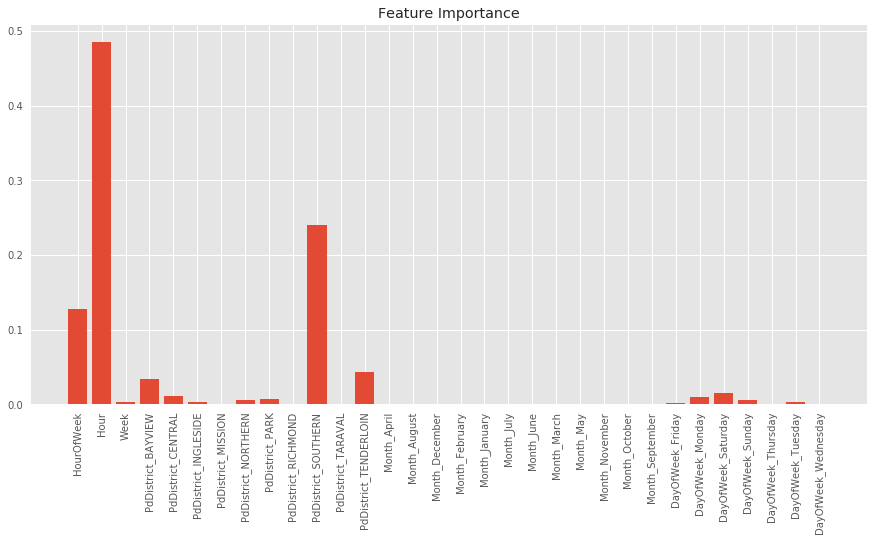

In [41]:
with plt.style.context(("seaborn", "ggplot")):
    plt.figure(figsize=(15,7))
    plt.bar(range(grid.best_estimator_.feature_importances_.shape[0]), grid.best_estimator_.feature_importances_)
    plt.xticks(range(grid.best_estimator_.feature_importances_.shape[0]), final_ml_df.drop(columns=["Category", "DateTime"]).columns, rotation=90)
    plt.title("Feature Importance")

We can see that features like `HourOfWeek, Hour, Week, PdDistrict_BAYVIEW and PdDistrict_SOUTHERN` are contributing more to prediction that other features. These columns plays major role in predicting crime as VEHICLE THEFT or FORGERY.

Part 2B: Info from weather features.
* Now add features from weather data to your random forest. 
  - Report accuracy. 
  - Discuss how the model performance changes relative to the version with no weather data.
  - Discuss what you have learned about crime from including weather data in your model.

In [42]:
weather_data = pd.read_csv("weather_data.csv")
weather_data.head()

,date,temperature,humidity,weather,wind_speed,wind_direction,pressure
0,2012-10-01T13:00:00.000Z,16.330000,88.0,light rain,2.0,150.0,1009.0
1,2012-10-01T14:00:00.000Z,16.324993,87.0,sky is clear,2.0,147.0,1009.0
2,2012-10-01T15:00:00.000Z,16.310618,86.0,sky is clear,2.0,141.0,1009.0
3,2012-10-01T16:00:00.000Z,16.296243,85.0,sky is clear,2.0,135.0,1009.0
4,2012-10-01T17:00:00.000Z,16.281869,84.0,sky is clear,2.0,129.0,1009.0


We are converting date column of weather data into proper format below so that it can be merged with crimes dataframe.

In [43]:
weather_data["date"] = pd.to_datetime(weather_data["date"])
weather_data["date"] = [datetime(dt.year, dt.month, dt.day, dt.hour, dt.minute) for dt in weather_data["date"]]
weather_data.head()

,date,temperature,humidity,weather,wind_speed,wind_direction,pressure
0,2012-10-01 13:00:00,16.330000,88.0,light rain,2.0,150.0,1009.0
1,2012-10-01 14:00:00,16.324993,87.0,sky is clear,2.0,147.0,1009.0
2,2012-10-01 15:00:00,16.310618,86.0,sky is clear,2.0,141.0,1009.0
3,2012-10-01 16:00:00,16.296243,85.0,sky is clear,2.0,135.0,1009.0
4,2012-10-01 17:00:00,16.281869,84.0,sky is clear,2.0,129.0,1009.0


**Merging Crime and Weather Data:** Below we are merging crime and weather data based on date column of both dataframes. We are converting datetime column of crime dataframe into proper format so that it can be easily merged with weather data.

In [44]:
crime_df["DateTime"] = pd.to_datetime(crime_df["DateTime"], utc=True)
crime_df["DateTime"] = [datetime(dt.year, dt.month, dt.day, dt.hour, 0) for dt in crime_df["DateTime"]]
crime_df = crime_df.merge(weather_data, how="left", right_on=["date"], left_on=["DateTime"])
crime_df.head()

,DateTime,Category,PdDistrict,DayOfWeek,Month,HourOfWeek,Hour,Week,date,temperature,humidity,weather,wind_speed,wind_direction,pressure
0,2005-08-13 17:00:00,VEHICLE THEFT,TENDERLOIN,Saturday,August,137.0,17.0,32.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,2005-03-23 19:00:00,VEHICLE THEFT,BAYVIEW,Wednesday,March,67.0,19.0,12.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2,2005-10-06 17:00:00,VEHICLE THEFT,RICHMOND,Thursday,October,89.0,17.0,40.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-02-03 21:00:00,VEHICLE THEFT,MISSION,Tuesday,February,45.0,21.0,6.0,2015-02-03 21:00:00,15.311,85.0,few clouds,1.0,60.0,1032.0
4,2015-02-02 19:00:00,VEHICLE THEFT,INGLESIDE,Monday,February,19.0,19.0,6.0,2015-02-02 19:00:00,13.764,91.0,scattered clouds,1.0,189.0,1034.0


Below, we are one-hot encoding "PdDistrict", "Month", "DayOfWeek" and "weather" columns of data which has categorical data. We are also removing entries which has one of more NAs present in it.

In [45]:
final_ml_df = pd.get_dummies(crime_df, columns=["PdDistrict", "Month", "DayOfWeek", "weather"])
print(final_ml_df.shape)
final_ml_df = final_ml_df.dropna()
print(final_ml_df.shape)
final_ml_df.head()

(145939, 68)
(34627, 68)


,DateTime,Category,HourOfWeek,Hour,Week,date,temperature,humidity,wind_speed,wind_direction,pressure,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN,Month_April,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,weather_broken clouds,weather_drizzle,weather_few clouds,weather_fog,weather_haze,weather_heavy intensity drizzle,weather_heavy intensity rain,weather_heavy snow,weather_light intensity drizzle,weather_light intensity shower rain,weather_light rain,weather_light snow,weather_mist,weather_moderate rain,weather_overcast clouds,weather_proximity shower rain,weather_proximity thunderstorm,weather_proximity thunderstorm with rain,weather_scattered clouds,weather_shower rain,weather_sky is clear,weather_smoke,weather_squalls,weather_thunderstorm,weather_thunderstorm with heavy rain,weather_thunderstorm with light rain,weather_thunderstorm with rain,weather_very heavy rain
3,2015-02-03 21:00:00,VEHICLE THEFT,45.0,21.0,6.0,2015-02-03 21:00:00,15.3110,85.0,1.0,60.0,1032.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2015-02-02 19:00:00,VEHICLE THEFT,19.0,19.0,6.0,2015-02-02 19:00:00,13.7640,91.0,1.0,189.0,1034.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,2015-01-26 09:00:00,FORGERY/COUNTERFEITING,9.0,9.0,5.0,2015-01-26 09:00:00,9.0385,98.0,2.0,75.0,1031.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6,2015-02-02 17:00:00,VEHICLE THEFT,17.0,17.0,6.0,2015-02-02 17:00:00,11.3900,95.0,1.0,106.0,1035.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7,2015-02-02 23:00:00,VEHICLE THEFT,23.0,23.0,6.0,2015-02-02 23:00:00,15.4380,83.0,1.0,310.0,1033.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
X = final_ml_df.drop(columns=["Category", "DateTime", "date"]).values
Y = final_ml_df["Category"].values
print("Dataset Size", X.shape, Y.shape)

Dataset Size (34627, 65) (34627,)


In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.90, stratify=Y, random_state=42)
print("Train/Test Sizes : ", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Train/Test Sizes :  (31164, 65) (3463, 65) (31164,) (3463,)


In [48]:
%%time

params_grid = {
                'n_estimators': [10, 50, 100, 200, 500],
                'max_depth':[None, 3, 5, 8],
                'max_features':['auto', 'sqrt', 'log2']
              }
grid = GridSearchCV(RandomForestClassifier(),param_grid=params_grid, cv=5, n_jobs=-1)
grid.fit(X_train, Y_train)

CPU times: user 3.75 s, sys: 266 ms, total: 4.02 s
Wall time: 5min 33s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [49]:
print("Best Parameters : ", grid.best_params_)

Best Parameters :  {'max_depth': None, 'max_features': 'log2', 'n_estimators': 100}


We can see that we are getting best results with `max_depth=None, max_features=log2 and n_estimators=100`.

In [50]:
print("Train Accuracy : %.2f%%"%(grid.best_estimator_.score(X_train, Y_train)*100))
print("Test Accuracy : %.2f%%"%(grid.best_estimator_.score(X_test, Y_test)*100))

Train Accuracy : 99.29%
Test Accuracy : 91.02%


We can see that our train and test accuracies are good and model has generalized well.

In [51]:
print("Confusion Matrix : ")
print(confusion_matrix(Y_test, grid.best_estimator_.predict(X_test)))
print()
print("Classification Report")
print(classification_report(Y_test, grid.best_estimator_.predict(X_test)))

Confusion Matrix : 
[[  68  283]
 [  28 3084]]

Classification Report
                        precision    recall  f1-score   support

FORGERY/COUNTERFEITING       0.71      0.19      0.30       351
         VEHICLE THEFT       0.92      0.99      0.95      3112

              accuracy                           0.91      3463
             macro avg       0.81      0.59      0.63      3463
          weighted avg       0.89      0.91      0.89      3463



From above confusion matrix and classification report, we can make conclusion that our model is still little biased towards predicting VEHICLE THEFT as it has many samples for training. But model has improved after adding weather data than previous model.

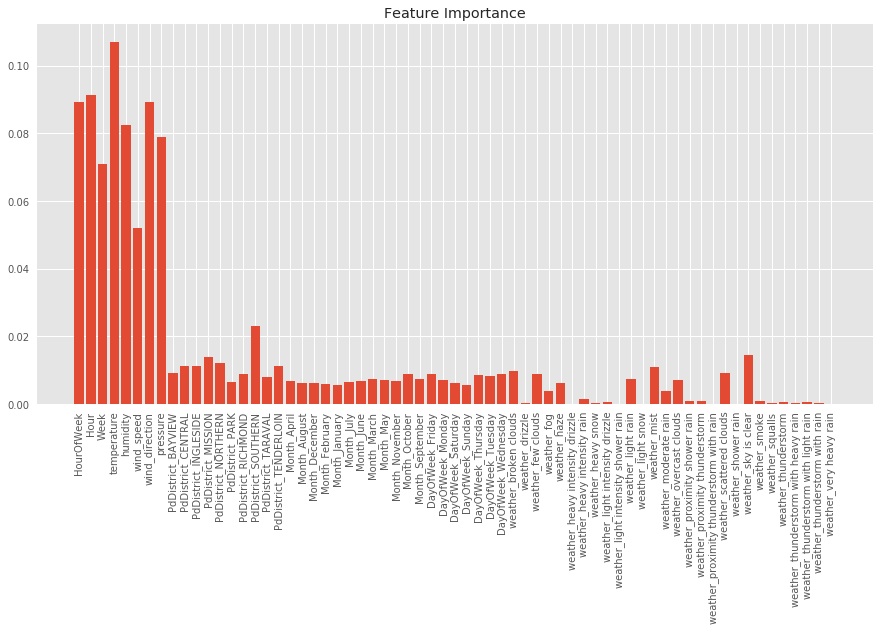

In [52]:
with plt.style.context(("seaborn", "ggplot")):
    plt.figure(figsize=(15,7))
    plt.bar(range(grid.best_estimator_.feature_importances_.shape[0]), grid.best_estimator_.feature_importances_)
    plt.xticks(range(grid.best_estimator_.feature_importances_.shape[0]), final_ml_df.drop(columns=["Category", "DateTime", "date"]).columns, rotation=90)
    plt.title("Feature Importance")

We can see that features like `HourOfWeek, Hour, Week, temperature, humidity,wind_speed, wind_direction,pressure and PdDistrict_SOUTHERN` are contributing more to prediction that other features. These columns plays major role in predicting crime as VEHICLE THEFT or FORGERY.